In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pandas.plotting import parallel_coordinates
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [2]:
India_csv = pd.read_csv('cowin_vaccine_data_statewise 1.csv', nrows=161)

In [3]:
#India_csv = pd.read_csv('cowin_vaccine_data_statewise.csv', index_col="Updated On", parse_dates=True)
#India_csv = pd.read_csv('cowin_vaccine_data_statewise.csv')
India_csv = India_csv.apply(lambda x: pd.Series(x.dropna().values))

In [4]:
India_csv.head

<bound method NDFrame.head of      Updated On  State  Total Doses Administered  Sessions   Sites   \
0    16/01/2021  India                     48276      3455     2957   
1    17/01/2021  India                     58604      8532     4954   
2    18/01/2021  India                     99449     13611     6583   
3    19/01/2021  India                    195525     17855     7951   
4    20/01/2021  India                    251280     25472    10504   
..          ...    ...                       ...       ...      ...   
156  21/06/2021  India                 283891764  35010311    68061   
157  22/06/2021  India                 289961746  23436266    54639   
158  23/06/2021  India                 296892521  27105115    59462   
159  24/06/2021  India                 303426850  26458510    56282   
160  25/06/2021  India                 309802519  27953093    55202   

     First Dose Administered  Second Dose Administered  \
0                      48276                         0   
1

In [5]:
India_csv = India_csv.drop(['60+ Years(Individuals Vaccinated)','18-44 Years(Individuals Vaccinated)','45-60 Years(Individuals Vaccinated)','Sessions','First Dose Administered','Second Dose Administered','CoviShield (Doses Administered)','Sputnik V (Doses Administered)','Male (Doses Administered)','Female (Doses Administered)','AEFI','18-44 Years (Doses Administered)','45-60 Years (Doses Administered)','60+ Years (Doses Administered)',' Sites ',' Covaxin (Doses Administered)'], axis = 1)

In [6]:
India_csv.head

<bound method NDFrame.head of      Updated On  State  Total Doses Administered  \
0    16/01/2021  India                     48276   
1    17/01/2021  India                     58604   
2    18/01/2021  India                     99449   
3    19/01/2021  India                    195525   
4    20/01/2021  India                    251280   
..          ...    ...                       ...   
156  21/06/2021  India                 283891764   
157  22/06/2021  India                 289961746   
158  23/06/2021  India                 296892521   
159  24/06/2021  India                 303426850   
160  25/06/2021  India                 309802519   

     Transgender (Doses Administered)  Male(Individuals Vaccinated)  \
0                                   2                       23757.0   
1                                   4                       27348.0   
2                                   5                       41361.0   
3                                  11                       8

In [7]:
India_csv = India_csv[India_csv['Total Doses Administered'].notna()]


Text(0, 0.5, 'Doses Administered in Hundreds of Millions')

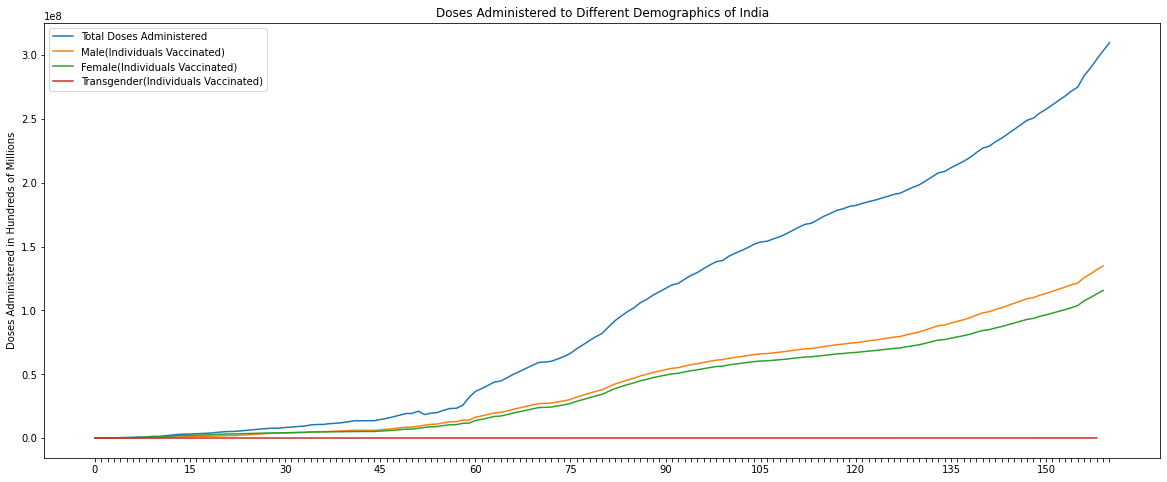

In [13]:
plt.figure(figsize=(20,8))
#sns.lineplot(data=India_csv)
xlabel='State'
x_axis = India_csv['Updated On'].tolist()
x_axis2 = []
for x in range(len(x_axis)):
    if x % 15 == 0:
        x_axis2.append(x)
    else:
        x_axis2.append('')

y_axis = India_csv['Total Doses Administered'].tolist()
y_axis1 = India_csv['Male(Individuals Vaccinated)'].tolist()
y_axis2 = India_csv['Female(Individuals Vaccinated)'].tolist()
y_axis3 = India_csv['Transgender(Individuals Vaccinated)'].tolist()

#y_axis = [x for x in y_axis if str(x) != 'nan']
plt.plot(x_axis,y_axis, label='Total Doses Administered')
plt.plot(x_axis,y_axis1, label='Male(Individuals Vaccinated) ')
plt.plot(x_axis,y_axis2, label='Female(Individuals Vaccinated)')
plt.plot(x_axis,y_axis3, label='Transgender(Individuals Vaccinated)')
plt.xticks(x_axis, x_axis2)

plt.legend()
#sns.lineplot(data=India_csv, x="Updated On", y="Total Doses Administered", color = "blue")
#MSE = [np.random.normal(0,1,10) for i in range(100)]
#Sim = np.arange(len(MSE))
#ax.set(xticks=Sim[0::196])
plt.title("Doses Administered to Different Demographics of India")
plt.ylabel('Doses Administered in Hundreds of Millions')
#plt.xlabel('Date')


In [10]:
y_axis = [x for x in y_axis if str(x) != 'nan']

In [11]:
print(y_axis)

[48276, 58604, 99449, 195525, 251280, 365965, 549381, 759008, 835058, 1277104, 1293784, 1726490, 2295491, 2814803, 3067736, 3127107, 3350265, 3527971, 3825835, 4314304, 4765924, 5111827, 5168099, 5615499, 6002474, 6462270, 6958553, 7423817, 7708211, 7732278, 8253651, 8577226, 9023239, 9338267, 10241508, 10619113, 10651012, 11243679, 11597768, 12042958, 12819074, 13560932, 13560983, 13561208, 13561208, 14533954, 15383883, 16535703, 17871673, 19170828, 19288666, 21038500, 18360243, 19538547, 19953987, 21772159, 23159604, 23317750, 25618250, 31870745, 36496020, 38770404, 41309219, 43877868, 44645372, 47204633, 49973152, 52216237, 54589220, 57021164, 59235436, 59557120, 60183064, 61990242, 63935590, 66361722, 70090836, 73112119, 76405697, 79439889, 82065337, 87100627, 91881530, 95583419, 99069354, 102000401, 105970539, 108598289, 111913288, 114598026, 117305344, 119971369, 121207098, 124457162, 127428887, 129646105, 132754608, 135658324, 138185956, 139185173, 142524947, 144879233, 14705339

In [12]:
India_csv

,Updated On,State,Total Doses Administered,Transgender (Doses Administered),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276,2,23757.0,24517.0,4.0,48276.0
1,17/01/2021,India,58604,4,27348.0,31252.0,5.0,58604.0
2,18/01/2021,India,99449,5,41361.0,58083.0,11.0,99449.0
3,19/01/2021,India,195525,11,81901.0,113613.0,24.0,195525.0
4,20/01/2021,India,251280,24,98111.0,153145.0,38.0,251280.0
...,...,...,...,...,...,...,...,...
156,21/06/2021,India,283891764,42702,125704054.0,107542051.0,43876.0,233288807.0
157,22/06/2021,India,289961746,43876,128567271.0,110074369.0,45301.0,238685516.0
158,23/06/2021,India,296892521,45301,131919150.0,112980429.0,46462.0,244944880.0
159,24/06/2021,India,303426850,46462,134941971.0,115668447.0,NaN,250656880.0
